<a href="https://colab.research.google.com/github/caesar013/PCVK_GENAP_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Transformasi Linier Brightness

Formula = *g(x,y) = f(x,y) + b*

*g(x,y)* adalah nilai pixel setelah transformasi, *f(x,y)* adalah nilai pixel asli, b adalah nilai brightness.

 Mengubah tingkat kecerahan citra
----------------------------------
Masukkan Nilai Kecerahan: 50


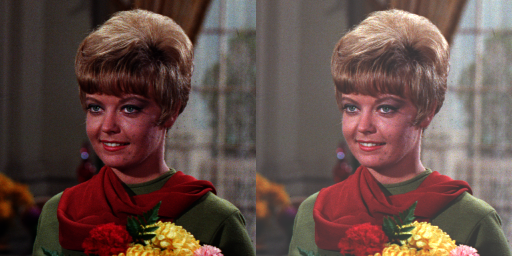

In [7]:
print(' Mengubah tingkat kecerahan citra')
print('----------------------------------')
try:
  brightness = int(input('Masukkan Nilai Kecerahan: '))
except:
  print('Error!!! Not a number!')

original = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness,0,255)
      # by using 3 for loops as we did above. we successfully access BGR and it allows us to change the value of them.
      # we use clip here in order to avoid error as we can't assign a value less than 0 or higher than 255.

# using list comprehension
# brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Tugas Praktikum

No. 1
Inverse Citra


𝑔(𝑥) = 255 − 𝑓(𝑥)

dimana  g(x,y) adalah citra negative, dan f(x,y) adalah citra asli

 Melakukan Inverse Citra
-------------------------


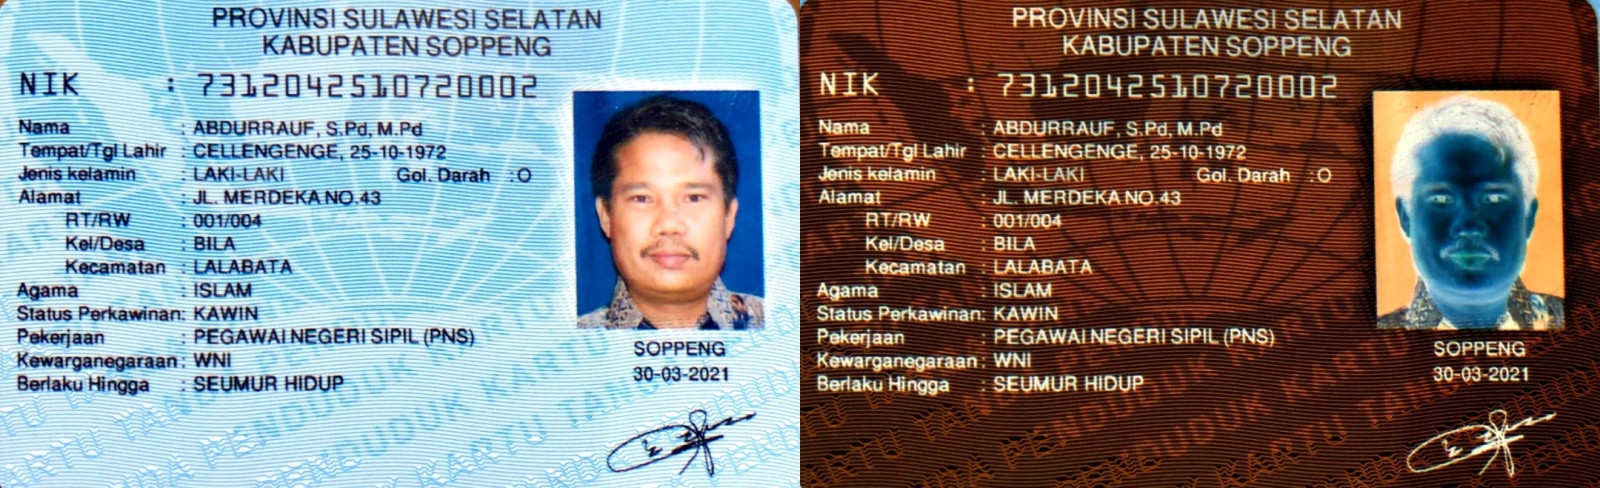

In [18]:
# No. 1
print(' Melakukan Inverse Citra')
print('-------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
inversed_image = np.array(original)


# # access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      inversed_image[y,x,c] = np.clip(255 - original[y,x,c], -255, 255)
      # by using 3 for loops as we did above. we successfully access BGR and it allows us to change the value of them.

# # using list comprehension
# # inversed_image = cv.bitwise_not(original)

final_frame = cv.hconcat((original, inversed_image))
cv2_imshow(final_frame)

No. 2

Transformasi Contrast

𝑔(𝑥, 𝑦) = 𝑎 ∗ 𝑓(𝑥, 𝑦) + 𝑏 , dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah
nilai pixel asli, a adalah nilai contrast, dan b adalah nilai brightness.


 Melakukan Transformasi Kontras citra
----------------------------------
Masukkan Nilai Kecerahan [-255 - 255]: 50
Masukkan Nilai Kontras [1.0 - 3.0]: 2


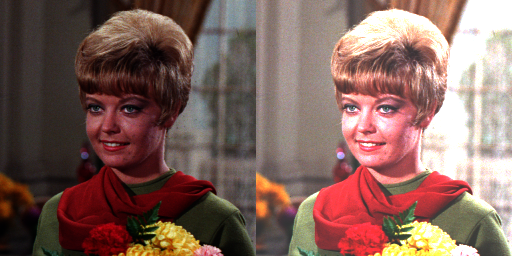

In [19]:
# No. 2
print(' Melakukan Transformasi Kontras citra')
print('----------------------------------')
try:
  brightness = int(input('Masukkan Nilai Kecerahan [-255 - 255]: '))
except:
  print('Error!!! Not a number!')

try:
  contrast = int(input('Masukkan Nilai Kontras [1.0 - 3.0]: '))
except:
  print('Error!!! Not a number!')

original = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)
      # by using 3 for loops as we did above. we successfully access BGR and it allows us to change the value of them.
      # we use clip here in order to avoid error as we can't assign a value less than 0 or higher than 255.

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

No. 3

Transformasi Logaritma

𝑠 = 𝑐 ∗ 𝑙𝑜𝑔(1 + 𝑟)

dimana

c : konstanta

r : nilai grey-level citra input

s : nilai grey-level citra output


 Melakukan Transformasi Logaritma citra
----------------------------------
Masukkan Nilai Kecerahan: 50


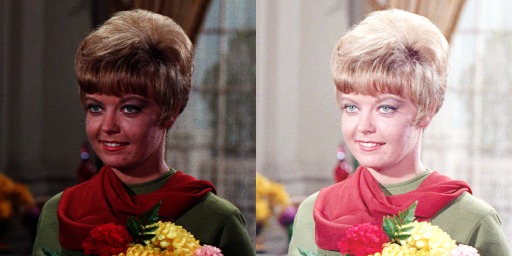

In [20]:
# No. 3
import math
print(' Melakukan Transformasi Logaritma citra')
print('----------------------------------')
try:
  brightness = int(input('Masukkan Nilai Kecerahan: '))
except:
  print('Error!!! Not a number!')

original = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(math.log(1+ original[y,x,c]) * brightness, 0, 255)
      # by using 3 for loops as we did above. we successfully access BGR and it allows us to change the value of them.

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

No. 4

Transformasi Grayscale

𝐺𝑟𝑎𝑦𝑠𝑐𝑎𝑙𝑒𝑎𝑣𝑔 =
(𝑅 + 𝐺 + 𝐵)/3

𝐺𝑟𝑎𝑦𝑠𝑐𝑎𝑙𝑒𝐿𝑖𝑔ℎ𝑡𝑛𝑒𝑠𝑠 =
(max[𝑅, 𝐺, 𝐵] + min[𝑅, 𝐺, 𝐵])/2

𝐺𝑟𝑎𝑦𝑠𝑐𝑎𝑙𝑒𝐿𝑢𝑚𝑖𝑛𝑎𝑛𝑐𝑒 = 0.21𝑅 + 0.72𝐺 + 0.07�

 Melakukan Transformasi Grayscale  average
-------------------------


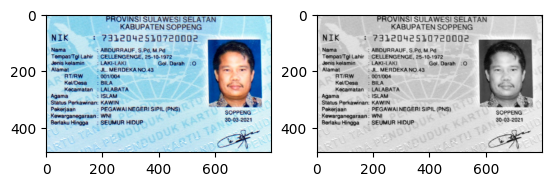

In [40]:
# No. 4
print(' Melakukan Transformasi Grayscale  average' )
print('-------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg', cv.IMREAD_UNCHANGED)
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
inversed_image = np.array(original)


# # access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      # by using 3 for loops as we did above. we successfully access BGR and
      # it allows us to change the value of them.
      avg = int(original[y,x,0]) + int(original[y,x,1]) + int(original[y,x,2])
      inversed_image[y,x,c] = np.clip(int(avg/3), 0, 255)

# # using list comprehension
# # inversed_image = cv.bitwise_not(original)

fig, ax = plt.subplots(1,2)
ax[0].imshow(original)
ax[1].imshow(inversed_image, cmap='gray')

Grayscale Lightness

 Melakukan Transformasi Grayscale lightness
-------------------------


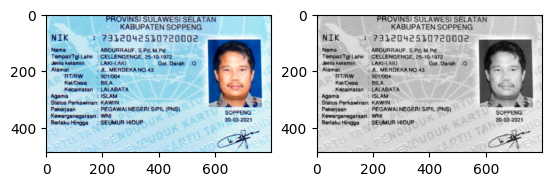

In [41]:
print(' Melakukan Transformasi Grayscale lightness' )
print('-------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg', cv.IMREAD_UNCHANGED)
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
inversed_image = np.array(original)

R = original[:,:,0]
G = original[:,:,1]
B = original[:,:,2]

max = np.maximum(np.maximum(G,B), R)
min = np.minimum(np.minimum(G,B), R)

# access per pixel
inversed_image = max/2 + min/2

fig, ax = plt.subplots(1,2)
ax[0].imshow(original)
ax[1].imshow(inversed_image, cmap='gray')

Grayscale Luminance

 Melakukan Transformasi Grayscale luminance
-------------------------


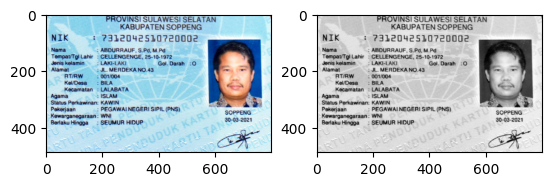

In [44]:
print(' Melakukan Transformasi Grayscale luminance' )
print('-------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg', cv.IMREAD_UNCHANGED)
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
inversed_image = np.array(original)

R = original[:,:,0]
G = original[:,:,1]
B = original[:,:,2]

# access per pixel
inversed_image = R * 0.21 + G * 0.72 + B * 0.07

fig, ax = plt.subplots(1,2)
ax[0].imshow(original)
ax[1].imshow(inversed_image, cmap='gray')

No. 5

Memunculkan 1 channel warna dan menjadikan lainnya menjadi grayscale

 Melakukan Transformasi Grayscale pada 2 channel
-------------------------


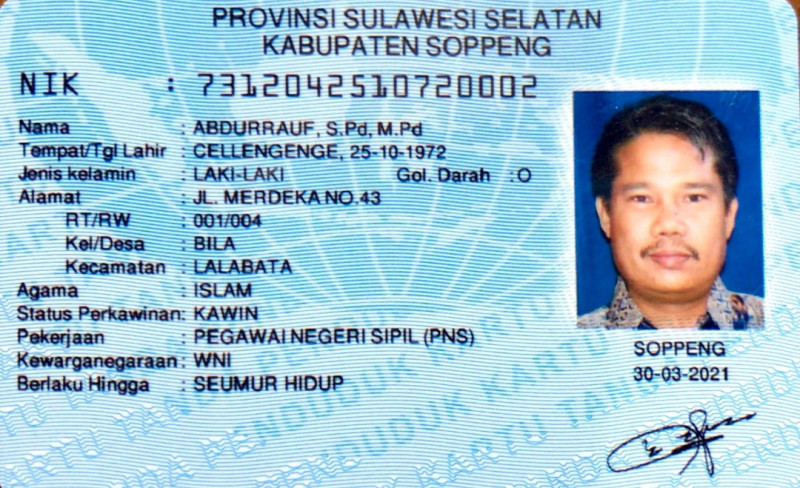

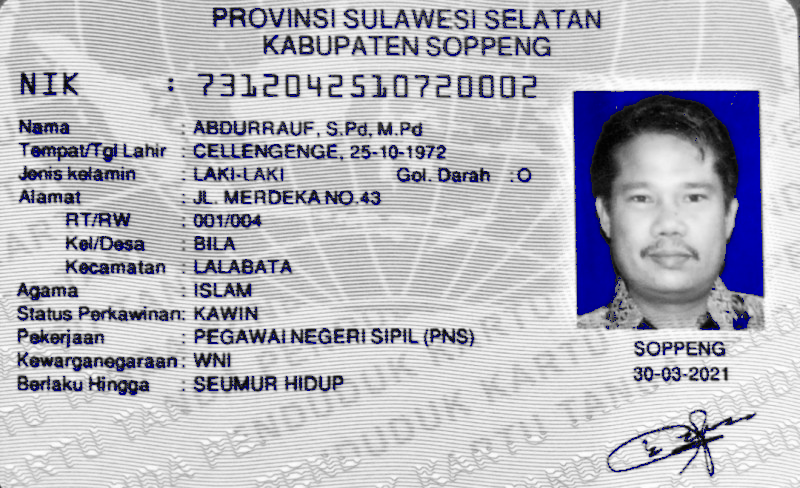

In [54]:
# No. 5

print(' Melakukan Transformasi Grayscale pada 2 channel' )
print('-------------------------')

# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

# Menentukan batas warna biru dalam format BGR
lower_blue = np.array([100, 0, 0], dtype=np.uint8)
upper_blue = np.array([255, 100, 100], dtype=np.uint8)

# Membuat mask untuk warna biru
mask_blue = cv.inRange(original, lower_blue, upper_blue)

# Mengonversi gambar asli ke skala abu-abu
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

# Menampilkan saluran biru dalam gambar asli
blue_channel = original.copy()
blue_channel[:, :, 1] = 0  # Saluran hijau menjadi 0
blue_channel[:, :, 2] = 0  # Saluran merah menjadi 0

# Menggunakan mask untuk menggabungkan saluran biru dengan gambar asli
result = cv.bitwise_and(blue_channel, blue_channel, mask=mask_blue)

# Menggabungkan saluran biru dengan gambar skala abu-abu
result_gray = cv.bitwise_and(gray, gray, mask=cv.bitwise_not(mask_blue))

# Menggabungkan gambar biru dengan gambar abu-abu
result_final = cv.add(result, cv.cvtColor(result_gray, cv.COLOR_GRAY2BGR))

# Menampilkan gambar hasil
cv2_imshow(original)
cv2_imshow(result_final)